In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import kagglehub
path = kagglehub.dataset_download("quora/question-pairs-dataset")

Resuming download from 0 bytes (21794834 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/quora/question-pairs-dataset?dataset_version_number=2 (0/21794834) bytes left.


100%|██████████| 20.8M/20.8M [00:12<00:00, 1.69MB/s]

Extracting files...


In [5]:
df = pd.read_csv(f"{path}/questions.csv")

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [15]:
df.shape

(404351, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='is_duplicate'>

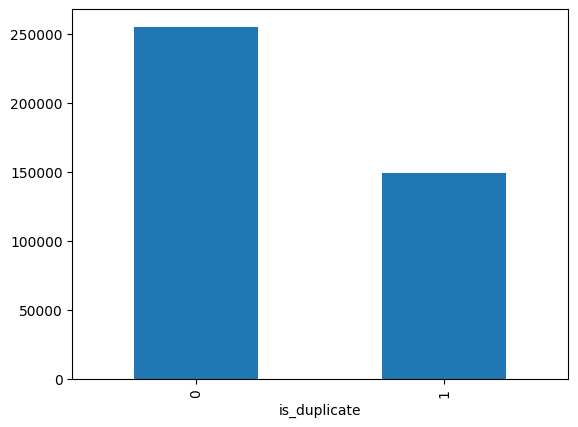

In [10]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


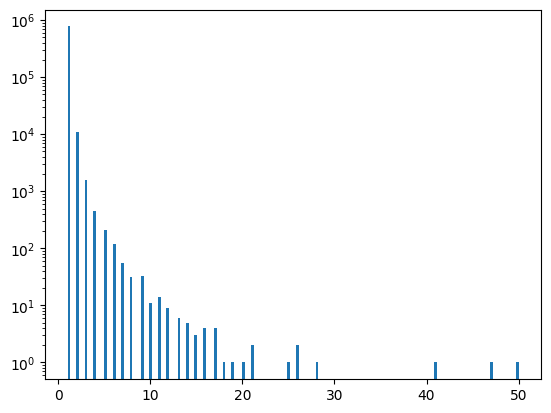

In [14]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()